In [1]:
import pandas as pd
import numpy as np

### **1. 2016 presidential election in US**

https://elections.huffingtonpost.com/2016/forecast/president

#### **1-1.** 자료 A와 자료 B를 각각 ‘pres’, ‘polls’라는 이름의 개체(DataFrame)로 저장하시오.

In [2]:
# 자료 A / turnout_2016 : 각 주의 카운티별 개표 결과
pres = pd.read_csv('/Users/bagtaejeong/Desktop/DSL/정규세션/기초과제/기초과제2/elementary2_dataset/turnout_2016.csv')

# 자료 B / polls_huffington : 미국 언론사 HuggingtonPost 여론조사 결과
polls = pd.read_csv('/Users/bagtaejeong/Desktop/DSL/정규세션/기초과제/기초과제2/elementary2_dataset/polls_huffington.csv')

#### **1-2.** 자료 A에서 집계된 대선 후보의 이름을 확인하고, 몇 명의 후보가 집계되었는지 파악하시오.

In [3]:
cand = pres['cand'].unique().tolist()
print(f'집계된 출마 후보 =  {cand}')

cand_pres = len(pres['cand'].unique()) - 1 # None of these candidates
print(f'집계된 출마 후보 수 = {cand_pres}')

집계된 출마 후보 =  ['Donald Trump', 'Hillary Clinton', 'Gary Johnson', 'Jill Stein', 'Evan McMullin', 'Darrell Castle', 'Gloria La Riva', 'Rocky De La Fuente', ' None of these candidates', 'Richard Duncan', 'Dan Vacek', 'Alyson Kennedy', 'Mike Smith', 'Chris Keniston', 'Lynn Kahn', 'Jim Hedges', 'Monica Moorehead', 'Peter Skewes', 'Emidio Soltysik', 'Scott Copeland', 'Rocky Giordani', 'Tom Hoefling', 'Laurence Kotlikoff', 'Kyle Kopitke', 'Joseph Maldonado', 'Michael Maturen', 'Princess Jacob', 'Ryan Scott', 'Rod Silva', 'Jerry White', 'Bradford Lyttle', 'Frank Atwood']
집계된 출마 후보 수 = 31


#### **1-3.** 자료 A로 다음의 조건을 만족하는 새로운 개체(DataFrame) ‘results’를 만드시오.
● 각 주에서의 클린턴 후보 득표율과 트럼프 후보 득표율을 저장 <br>
● 총 열 개수는 3개가 되어야 함 - 열 이름 : State, Clinton, Trump <br>
● 총 행 개수는 워싱턴 D.C.를 포함하여 51개가 되어야 함 <br>

In [4]:
# 전처리
query_pres = pres.query('county.isna() & fips != "US" & (cand == "Donald Trump" or cand == "Hillary Clinton")')

In [5]:
pivot_pres = query_pres.pivot(index = 'state.name', columns = 'cand', values = 'pct').reset_index().rename_axis(None, axis = 1)
results = pivot_pres.rename(columns = {'state.name':'State', 'Donald Trump':'Trump', 'Hillary Clinton':'Clinton'})[['State','Clinton','Trump']]
results.iloc[0,0] = 'Washington D.C.'
results

,State,Clinton,Trump
0,Washington D.C.,0.928466,0.041221
1,Alabama,0.345538,0.628884
2,Alaska,0.377176,0.528878
3,Arizona,0.453871,0.495031
4,Arkansas,0.337643,0.604363
5,California,0.615885,0.327598
6,Colorado,0.472746,0.443593
7,Connecticut,0.544755,0.411610
8,Delaware,0.533550,0.419226
9,Florida,0.477881,0.490640


#### **1-4.** 다음의 조건을 만족하는 새로운 개체(DataFrame) ‘CL’ 및 ‘TR’을 만드시오.
● CL : 클린턴 후보의 자료, TR : 트럼프 후보의 자료 <br>
● 50개 주 각각에서 후보의 실제 득표율, 예측 득표율, 표본 수를 저장 <br>
● 예측 득표율의 경우, 선거일 기준 가장 최근의 날짜에 집계된 결과만 활용(누적된 결과이므로) <br>
● 총 열 개수는 4개가 되어야 함 - 열 이름 : State, Real, Prediction, Sample_size <br>
● 총 행 개수는 워싱턴 D.C.를 포함하여 51개가 되어야 함 <br>

In [6]:
# polls

In [7]:
# polls 데이터 전처리 : CL
CL_polls = polls.loc[:, ['state','Clinton','days_to_election', 'sample_size']]
CL_polls = CL_polls.groupby('state').apply(lambda x : x.loc[x['days_to_election'].idxmin()]) #idxmax()

del CL_polls['state']
CL_polls.reset_index(inplace = True)
CL_polls['state'] = CL_polls['state'].str.title()

del CL_polls['days_to_election']
CL_polls['state'] = CL_polls['state'].str.replace('-', ' ').replace('Dc','Washington D.C.')

In [8]:
# polls 데이터 전처리 : TR
TR_polls = polls.loc[:, ['state','Trump','days_to_election', 'sample_size']]
TR_polls = TR_polls.groupby('state').apply(lambda x : x.loc[x['days_to_election'].idxmin()]) #idxmax()

del TR_polls['state']
TR_polls.reset_index(inplace = True)
TR_polls['state'] = TR_polls['state'].str.title()

del TR_polls['days_to_election']
TR_polls['state'] = TR_polls['state'].str.replace('-', ' ').replace('Dc','Washington D.C.')

In [9]:
# df merge 
# results 열 수정 State -> state Clinton -> Real CL, Trump -> Real TR
results.rename(columns = {'State':'state', 'Clinton':'Real CL', 'Trump':'Real TR'}, inplace = True)
CL_results = results.iloc[:,:2]
TR_results = results.iloc[:,[0,2]]

# State 기준 병합 / 열이름: State, Real, Prediction, Sample_size
pre_CL = CL_results.merge(CL_polls, on='state', how = 'outer')
CL = pre_CL.rename(columns = {'state':'State', 'Clinton':'Prediction CL','sample_size':'Sample_size'})

pre_TR = TR_results.merge(TR_polls, on='state', how = 'outer')
TR = pre_TR.rename(columns = {'state':'State', 'Trump':'Prediction TR','sample_size':'Sample_size'})

In [10]:
# 결과 확인
TR.head()
# CL.head()

,State,Real TR,Prediction TR,Sample_size
0,Washington D.C.,0.041221,0.07,310.0
1,Alabama,0.628884,0.55,1131.0
2,Alaska,0.528878,0.48,409.0
3,Arizona,0.495031,0.43,392.0
4,Arkansas,0.604363,0.56,930.0


#### **1-5.** 후보별 득표율의 예측오차 분포를 히스토그램으로 시각화하시오.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

##### 1) Clinton

In [12]:
# # matplotlib
# # Bias_C : Clinton 후보의 예측오차
# Bias_C = CL['Prediction CL'] - CL['Real CL']
# plt.hist(Bias_C)
# plt.show()

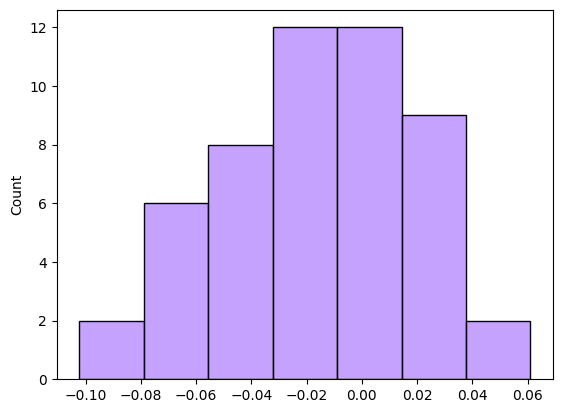

In [13]:
# seaborn
Bias_C = CL['Prediction CL'] - CL['Real CL']
sns.histplot(x = Bias_C, color = '#B483FF')
plt.show()

##### 2) Trump

In [14]:
# # Bias_T : Trump 후보의 예측오차
# Bias_T = TR['Prediction TR'] - TR['Real TR']
# plt.hist(Bias_T)
# plt.show()

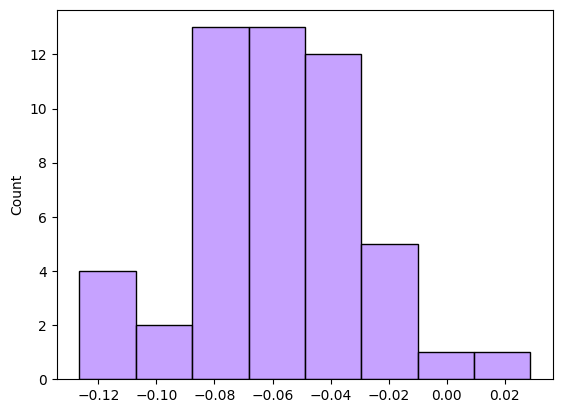

In [15]:
# seaborn
Bias_T = TR['Prediction TR'] - TR['Real TR']
sns.histplot(x = Bias_T, color = '#B483FF')
plt.show()

#### **1-6.** ‘CL’과 ‘TR’에 각각 표준오차를 담은 ‘SE’라는 열(column)을 추가하시오.


In [16]:
TR['SE'] = ((TR['Prediction TR']*(1 - TR['Prediction TR']))/TR['Sample_size'])**0.5
CL['SE'] = ((CL['Prediction CL']*(1 - CL['Prediction CL']))/CL['Sample_size'])**0.5

In [17]:
# 결과 확인
# TR.head()
CL.head()

,State,Real CL,Prediction CL,Sample_size,SE
0,Washington D.C.,0.928466,0.85,310.0,0.020280
1,Alabama,0.345538,0.36,1131.0,0.014273
2,Alaska,0.377176,0.31,409.0,0.022869
3,Arizona,0.453871,0.41,392.0,0.024841
4,Arkansas,0.337643,0.32,930.0,0.015296


#### **1-7.** ‘CL’과 ‘TR’에 각각 근사신뢰구간(approximate confidence interval)의 하한과 상한을 나타내는 열(column) ‘lower’과 ‘upper’를 추가하시오(유의수준 5%).

In [18]:
# 분위수값 구하는 방법
from scipy.stats import norm
Z = norm(loc = 0, scale = 1) # 표준정규분포를 따르는 확률변수 만들기
z = Z.ppf(0.975) # 유의수준 5%

In [19]:
TR['lower'] = TR['Prediction TR'] - z*TR['SE']
TR['upper'] = TR['Prediction TR'] + z*TR['SE']

CL['lower'] = CL['Prediction CL'] - z*CL['SE']
CL['upper'] = CL['Prediction CL'] + z*CL['SE']

In [20]:
# 결과 확인
TR.head()
# CL.head()

,State,Real TR,Prediction TR,Sample_size,SE,lower,upper
0,Washington D.C.,0.041221,0.07,310.0,0.014491,0.041597,0.098403
1,Alabama,0.628884,0.55,1131.0,0.014793,0.521006,0.578994
2,Alaska,0.528878,0.48,409.0,0.024704,0.431582,0.528418
3,Arizona,0.495031,0.43,392.0,0.025005,0.380991,0.479009
4,Arkansas,0.604363,0.56,930.0,0.016277,0.528097,0.591903


#### **1-8.** 클린턴 후보와 트럼프 후보 각각의 여론조사 신뢰수준을 구하시오.

##### 1) Clinton

In [21]:
CL['CI'] = (CL['Real CL'] >= CL['lower']) & (CL['Real CL'] <= CL['upper'])

# Clinton 신뢰수준
CL['CI'].mean()

# 95% 신뢰수준으로 추정했는데, 실제로는 61%

0.6078431372549019

##### 2) Trump

In [22]:
TR['CI'] = (TR['Real TR'] >= TR['lower']) & (TR['Real TR'] <= TR['upper'])

# Trump 신뢰수준
TR['CI'].mean()

# 95% 신뢰수준으로 추정했는데, 실제로는 22%

0.21568627450980393

#### **1-9.** ✎ 왜 이런 결과가 나왔다고 생각하십니까? 개인의 생각을 자유롭게 서술하시오.
참고1 : https://www.vox.com/policy-and-politics/2020/11/10/21551766/election-polls-results-wrong-david-shor

참고2 : https://m.dongascience.com/news.php?idx=21722

"연구팀은 여론조사가 이뤄지던 사전 선거운동 기간 내의 오차 변화도 살폈다. 선거 200일 전부터 이뤄진 여론조사 결과와 최종 선거 결과 사이의 오차를 살펴본 결과, 예상대로 오차는 본선거에 가까워질수록 줄어들었다. 즉 정확도가 향상됐다. 선거 150일 전까지 4%대를 유지하던 오차는 50일 전에 3%대로 떨어졌고, 선거 전날에는 2% 대에 떨어졌다. 총선과 대선 사이에서는 대선의 등락이 훨씬 컸다. 대선은 200일 전에 6%에 달하던 오류율이 선거 전날 3% 대로 떨어졌다. 총선은 1940년대에도 3% 대의 오차를 보여 안정적이었다."(밑에서 2번째 문단)

여론조사와 본선거의 결과가 다른 이유는 크게 2가지가 있을 것이다.

첫번째는 표본이 대표성을 가지지 못한 경우이다. 참고1을 보면 미국의 경우, 여론조사에 응답한 집단과 그렇지 않은 집단에 유의한 차이가 있다고 밝히고 있다. 따라서 조사를 진행할 때 이런 차이를 반영해서 가중치를 계산해줘야 하는데 이런 차이를 사전에 인식하지 못하면 편향된 결과가 나오게 되는 것이다.

두번째는 본선거와 여론조사 사이의 기간이 먼 경우이다. 참고2를 보면 여론조사에서 본선거사이의 기간이 멀어질수록 정확도가 떨어진다고 했다. TR과 CL 데이터의 경우 days_to_election의 mean값으로 그 기간을 확인할 수 있는데, 구해보면 3.8일이다. 이는 참고2에 따르면 본선거로부터 50일, 100일 이상 떨어진 것이 아니므로 기간이 멀어서 여론조사와 본 선거의 결과가 다르다고 말하긴 어려울 것이다.
실제로 1-4의 idxmin() 코드를 idxmax()로 바꿔서 돌려보면 본선거로부터 약 281일정도 떨어진 여론조사의 신뢰수준을 볼 수 있다. 결과는 Clinton의 경우 61% -> 49%, Trump의 경우 22% -> 0.09%로 기존 idxmin()에 비해 정확도가 더 떨어진 것을 확인할 수 있다.

즉 2가지 요인 중 2번째에는 해당이 되지 않으므로 해당 여론조사는 표본이 대표성을 가지지 못했기 때문에 결과가 달라진 것으로 볼 수 있다.

In [23]:
# 여론조사와 실제 선거 사이의 기간 구해보기 => days_to_election mean 값 구해보기
# 1-4번 코드에서 del TR(CL)['days_to_election'] 코드만 주석 처리 후 실행한 코드 

# polls 데이터 전처리 : CL
CL_polls = polls.loc[:, ['state','Clinton','days_to_election', 'sample_size']]
CL_polls = CL_polls.groupby('state').apply(lambda x : x.loc[x['days_to_election'].idxmin()]) # idxmax()

del CL_polls['state']
CL_polls.reset_index(inplace = True)
CL_polls['state'] = CL_polls['state'].str.title()

# del CL_polls['days_to_election'] 달라진 부분(1)
CL_polls['state'] = CL_polls['state'].str.replace('-', ' ').replace('Dc','Washington D.C.')

# polls 데이터 전처리 : TR
TR_polls = polls.loc[:, ['state','Trump','days_to_election', 'sample_size']]
TR_polls = TR_polls.groupby('state').apply(lambda x : x.loc[x['days_to_election'].idxmin()]) # idxmax()

del TR_polls['state']
TR_polls.reset_index(inplace = True)
TR_polls['state'] = TR_polls['state'].str.title()

# del TR_polls['days_to_election'] 달라진 부분(2)
TR_polls['state'] = TR_polls['state'].str.replace('-', ' ').replace('Dc','Washington D.C.')

# df merge 
# results 열 수정 State -> state Clinton -> Real CL, Trump -> Real TR
results.rename(columns = {'State':'state', 'Clinton':'Real CL', 'Trump':'Real TR'}, inplace = True)
CL_results = results.iloc[:,:2]
TR_results = results.iloc[:,[0,2]]

# State 기준 병합 / 열이름: State, Real, Prediction, Sample_size
pre_CL = CL_results.merge(CL_polls, on='state', how = 'outer')
CL = pre_CL.rename(columns = {'state':'State', 'Clinton':'Prediction CL','sample_size':'Sample_size'})

pre_TR = TR_results.merge(TR_polls, on='state', how = 'outer')
TR = pre_TR.rename(columns = {'state':'State', 'Trump':'Prediction TR','sample_size':'Sample_size'})

In [24]:
TR_dayelection_mean = TR['days_to_election'].mean()
CL_dayelection_mean = CL['days_to_election'].mean()

print(f'Trump의 여론조사와 선거 사이 기간 : {TR_dayelection_mean}')
print(f'Clinton의 여론조사와 선거 사이 기간 : {CL_dayelection_mean}')

Trump의 여론조사와 선거 사이 기간 : 3.843137254901961
Clinton의 여론조사와 선거 사이 기간 : 3.843137254901961
